In [2]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [3]:
# Read white wine data
white= pd.read_csv("winequality-white.csv", sep=';')

In [4]:
# read red wine data
red= pd.read_csv("winequality-redd.csv", sep=';')

In [5]:
# add column to 'red' with value 1
red['type']= 1
# add column to white with value 0
white['type']= 0
# Append 'white' to red
wines= red.append(white, ignore_index= True)

In [7]:
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
wines.shape

(6497, 13)

### Regression

In [13]:
# Defining X and y
X1= wines.iloc[:,:9].values
y1= wines['alcohol'].values

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso()
#alphas = np.logspace(-4, -0.5, 30)
alphas= (0.0001,0.001,0.01,0.1,0.0,1,10)
tuned_parameters = [{'alpha': alphas}]

In [28]:
# train and test splitting the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.1, random_state = 0)

In [29]:
# Standrized the data
scaler= StandardScaler().fit(X1_train)
X1_train=scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [30]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=lasso, X=X1_train, y=y1_train, cv=5) 

In [31]:
print(all_accuracies)

[-4.28285941e-04 -1.10931776e-03 -1.84786665e-03 -1.46276423e-03
 -7.56358719e-05]


In [32]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(lasso, tuned_parameters, cv=5)
grid_search.fit(X1_train, y1_train)

print("Test set score: {:.2f}".format(grid_search.score(X1_test, y1_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.76
Best parameters: {'alpha': 0.0}
Best cross-validation score: 0.76

Best estimator:
Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


### binary classification

In [9]:
import numpy as np
# Specify the data
Xb=wines.iloc[:,0:11]
#Specify the target leves
yb=np.array(wines.type)

In [21]:
#split the data up in test and train sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.33, random_state=42)

In [22]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
#Define the scaler
scaler= StandardScaler().fit(Xb_train)
#scale tha train
Xb_train = scaler.transform(Xb_train)
# Scale the test set
Xb_test = scaler.transform(Xb_test)

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,99]
              }

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(Xb_train, yb_train)

print("Test set score: {:.2f}".format(grid_search.score(Xb_test, yb_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.99
Best parameters: {'C': 1}
Best cross-validation score: 1.00

Best estimator:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### multiclass classifire

In [19]:
#Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
wines['quality_categorical'] = pd.cut(wines['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
display(wines.head(n=2))
# Split the data into features and target label
yq = wines['quality_categorical']
Xq = wines.drop(['quality', 'quality_categorical'], axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_categorical
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1


In [20]:
# Split the data into features and target label
yq = wines['quality_categorical']
Xq = wines.drop(['quality', 'quality_categorical'], axis = 1)

In [21]:
# train and test splitting the data
Xq_train, Xq_test, yq_train, yq_test = train_test_split(Xq, yq, test_size = 0.1, random_state = 0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc=  RandomForestClassifier(n_estimators=200, random_state=0)

In [23]:
grid_param = grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [24]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rfc,grid_param,'accuracy', cv=5, n_jobs=-1)

grid_search.fit(Xq_train, yq_train)

print("Test set score: {:.2f}".format(grid_search.score(Xq_test, yq_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.84
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 500}
Best cross-validation score: 0.85

Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


#In all cases gridsearchcv gives higher accuracy

### 2. binary classification with SVC

In [25]:
# Support vector Classifire
# Standradrized the model
from sklearn.svm import SVC
svc= SVC()
svc.fit(Xb_train, yb_train)
pred_svc = svc.predict(Xb_test)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,99],
              'kernel':['linear','rbf'],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(Xb_train, yb_train)

print("Test set score: {:.2f}".format(grid_search.score(Xb_test, yb_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))

Test set score: 1.00
Best parameters: {'C': 99, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 1.00



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.1, gamma =  0.1, kernel= 'rbf')
svc2.fit(Xb_train, yb_train)
pred_svc2 = svc2.predict(Xb_test)
print(classification_report(yb_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1588
          1       0.99      0.98      0.99       557

avg / total       0.99      0.99      0.99      2145



In [40]:
!pip install mglearn
import mglearn

In [59]:


# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
#display(results.head())

C:\Users\Omistaja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Omistaja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Omistaja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Omistaja\Anaconda3\lib\site-packages\sk

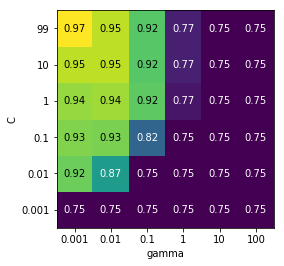

In [62]:
scores = np.array(results.mean_test_score).reshape(len(param_grid['C']), len(param_grid['gamma']))
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

### Receiver Operating Characteristic (ROC) Curves

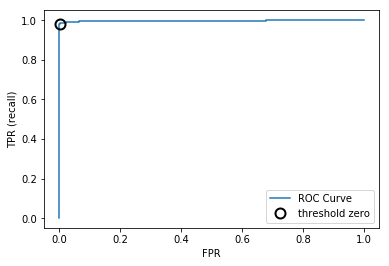

In [78]:
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
from sklearn import metrics
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(yb_test, svc.decision_function(Xb_test))

plt.plot(fpr, tpr, label="ROC Curve") 
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero 
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,         
         label="threshold zero", fillstyle="none", c='k', mew=2) 
plt.legend(loc=4)


### AUC

In [79]:
from sklearn.metrics import roc_auc_score 
svc_auc = roc_auc_score(yb_test, svc.decision_function(Xb_test)) 
print("AUC for SVC: {:.3f}".format(svc_auc))


AUC for SVC: 0.997


### 3.  SVC with AUC 

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,99],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


grid_search = GridSearchCV(SVC(), param_grid,scoring='roc_auc', cv=5)

grid_search.fit(Xb_train, yb_train)

print("Test set score: {:.2f}".format(grid_search.score(Xb_test, yb_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 1.00
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 1.00

Best estimator:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [91]:
from sklearn.cross_validation import cross_val_score
cross_val_score(SVC(), X=Xb_train, y= yb_train, cv=5, scoring='roc_auc').mean()

0.9972789235728495

#When using accuracy, the parameters gamma=0.01 and C=99 ,are selected, while gamma=0.1 and C=10 are selected when using AUC. The cross-validation accuracy is consistent with the test set accuracy in both cases. However, using AUC found a better parameter setting in terms of AUC and even in terms of accuracy